high Array size 1258
low Array size 1258
open Array size 1258
close Array size 1258
[84.349998 84.830002 85.43     ... 56.59     56.       55.869999]
1742.8400040000001
87.14200020000001
1748.4800040000002
87.42400020000001
1752.46
87.623
1756.6999980000003
87.83499990000001
1760.3900010000002
88.01950005
1764.180002
88.2090001
1767.5000020000002
88.37500010000001
1770.049997
88.50249985
1773.369997
88.66849985
1775.5799960000002
88.77899980000001
1777.849992
88.8924996
1779.889993
88.99449965
1781.6899959999998
89.08449979999999
1783.4599999999998
89.17299999999999
1785.07
89.2535
1784.96
89.248
1786.089997
89.30449985
1786.6799940000003
89.33399970000002
1787.0099960000002
89.35049980000001
1787.8399900000002
89.39199950000001
1789.9799890000002
89.49899945000001
1790.7799920000002
89.53899960000001
1792.6399920000001
89.6319996
1792.9499970000002
89.64749985
1794.8799889999998
89.74399944999999
1795.739989
89.78699945
1796.369994
89.81849969999999
1798.239997
89.91199985
1798.849997

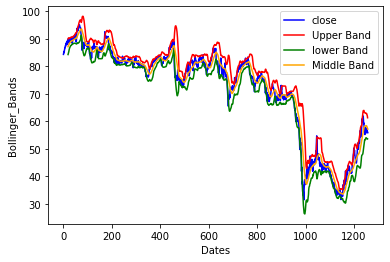

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
df = pd.read_csv('../stock_data/XOM.csv')
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
plt.ylabel('Bollinger_Bands')
plt.xlabel('Dates')
plt.legend()
plt.figure()
plt.show()
